by [Leonardo Manríquez M](https://github.com/leomanriquezm)

E-mail: leonardomanriquezmendez@gmail.com

#Modelo de regresión lineal múltiple

Para los siguientes ejemplos utilizaremos el siguiente conjunto de datos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

file="https://raw.githubusercontent.com/leomanriquezm/introduction-to-econometrics/main/df_example.csv"
df=pd.read_table(file,delimiter = ',')
df

,Unnamed: 0,EdadClientes,PrecioProducto,Publicidad,Descuento,UbicacionTienda,Ventas
0,0,56,36.413936,1,0.162762,Centro,2548.808140
1,1,46,11.267184,0,0.152644,Centro,2033.861925
2,2,32,27.895816,0,0.190900,Centro,1964.515507
3,3,60,74.020776,0,0.075139,Centro,2533.488304
4,4,25,81.115799,1,0.176961,Centro,2213.377108
...,...,...,...,...,...,...,...
95,95,24,55.737890,0,0.017458,Centro,1887.708504
96,96,26,72.623153,0,0.274564,Periferia,1806.042233
97,97,41,87.252292,0,0.132706,Centro,2236.135661
98,98,18,39.336301,1,0.071936,Centro,1778.786740


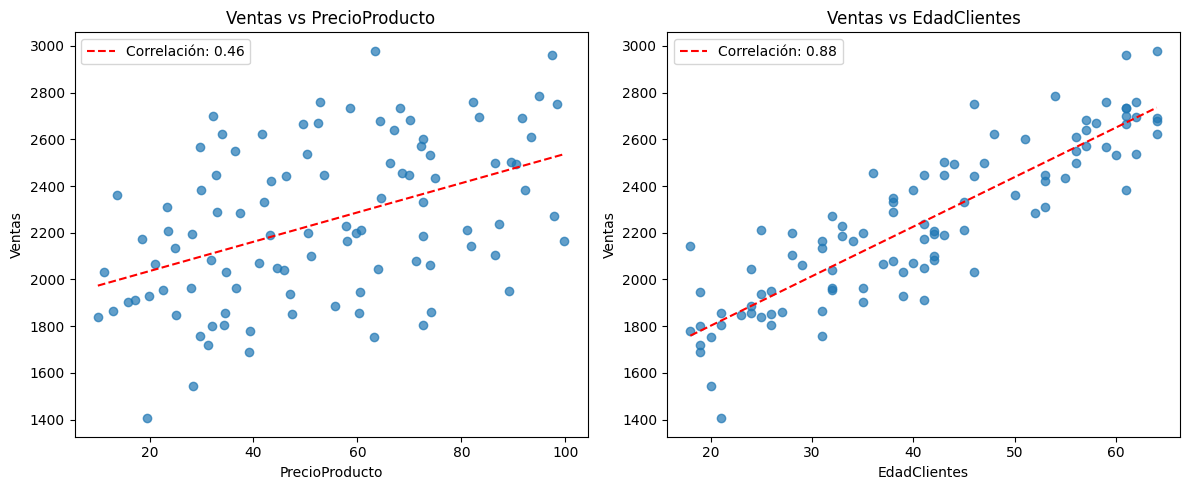

In [2]:
variables_explicativas = ['PrecioProducto', 'EdadClientes']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, variable in enumerate(variables_explicativas):
    axes[i].scatter(df[variable], df['Ventas'], alpha=0.7)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas vs {variable}')

    # Añadir la línea de regresión lineal
    coef_correlation = np.corrcoef(df[variable], df['Ventas'])[0, 1]
    axes[i].plot(np.unique(df[variable]), np.poly1d(np.polyfit(df[variable], df['Ventas'], 1))(np.unique(df[variable])),
                 color='red', linestyle='--', label=f'Correlación: {coef_correlation:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     311.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           6.35e-43
Time:                        22:07:40   Log-Likelihood:                -623.44
No. Observations:                 100   AIC:                             1253.
Df Residuals:                      97   BIC:                             1261.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1204.5106     44.286     27.

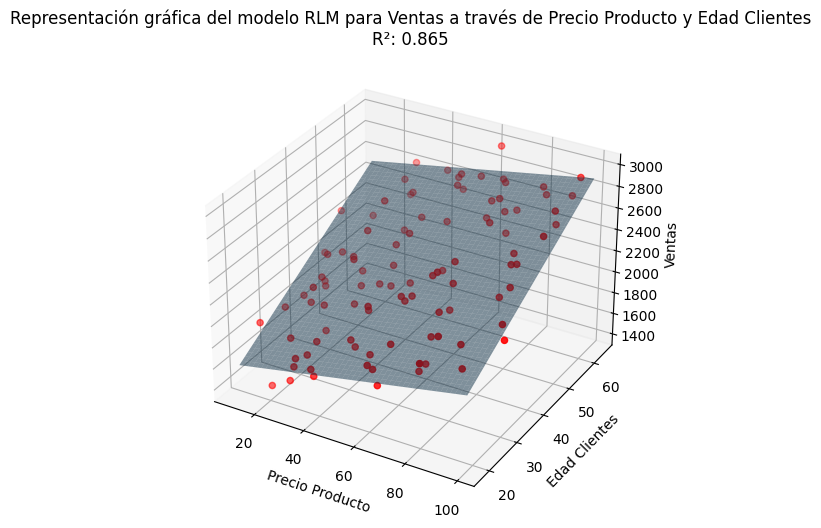

In [ ]:
# Ajustar el modelo de regresión lineal múltiple
X = df[['EdadClientes',"PrecioProducto"]]
X = sm.add_constant(X)  # Agregar columna de unos para el término constante
y = df['Ventas']

model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

# Obtener los coeficientes de la recta de regresión
coef_intercept = model.params[0]
coef_EdadClientes, coef_PrecioProducto = model.params[1:]

# Configurar el tamaño del gráfico
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico en 3D
ax.scatter(df["PrecioProducto"], df["EdadClientes"], df["Ventas"], c='r', marker='o')

# Agregar la recta de regresión
EdadClientes_range = np.linspace(min(df["EdadClientes"]), max(df["EdadClientes"]), 100)
PrecioProducto_range = np.linspace(min(df["PrecioProducto"]), max(df["PrecioProducto"]), 100)
EdadClientes_range, PrecioProducto_range = np.meshgrid(EdadClientes_range, PrecioProducto_range)
Ventas_range = coef_intercept + coef_EdadClientes * EdadClientes_range + coef_PrecioProducto * PrecioProducto_range
ax.plot_surface(PrecioProducto_range, EdadClientes_range, Ventas_range, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Precio Producto')
ax.set_ylabel('Edad Clientes')
ax.set_zlabel('Ventas')

# Coeficiente de determinación (R²)
r_squared = model.rsquared

# Coeficiente de determinación ajustado (R² ajustado)
r_squared_adj = model.rsquared_adj

# Título del gráfico
ax.set_title(f'Representación gráfica del modelo RLM para Ventas a través de Precio Producto y Edad Clientes\nR²: {r_squared:.3f}')

# Mostrar el gráfico
plt.show()
